In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import regressor models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# import ensmble meethod
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# import model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
# import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [5]:
# loaded baseball csv formate dataset
ds=pd.read_csv('baseball.csv')
# loaded into frame 
df=pd.DataFrame(ds)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Describe variable

In [6]:
df.shape  #check shape of datset

(30, 17)

dataset have number of rows are 30 and number of columns are 17 including with target columns(WINS)

In [7]:
df.info()  #getting inforamation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


dataset type is frame.daatframe and there is 17 columns including target columns.
There no null value are present in all columns.
Here Earned runs average have float type value and other 16 columns have int type value.

# Check null value

In [8]:
df.isnull().sum().sum()   # check total null value 

0

There is no null value 

In [9]:
df.isnull().sum()  #check null value in particular variable columns

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null value are present in variable columns

<AxesSubplot:>

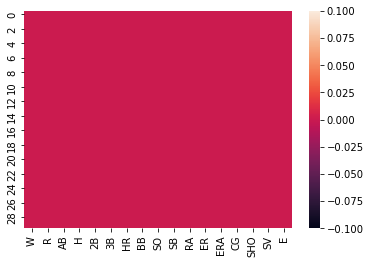

In [10]:
sns.heatmap(df.isnull())   #plot null values

# Check unique values of int and categorical data

In [11]:
df['W'].unique()    #check unique values of Columns WINS

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

There are total unique values present out of 30 rows is 24 and 6 values are duplicate

In [12]:
df['R'].unique()   #check unique values of Columns RUNS

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

There are total unique values present out of 30 rows is 28 and 2 values are duplicate

In [13]:
df['AB'].unique()       #check unique values of Columns AT BAT

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [14]:
df['H'].unique()   #check unique values of Columns At BAT

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [15]:
df['2B'].unique()     #check unique values of Columns At DOUBLE

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

There are total unique values present out of 30 rows is 22 and 8 values are duplicate

In [16]:
df['3B'].unique()    #check unique values of Columns At TRIPLE

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

There are total unique values present out of 30 rows is 23 and 7 values are duplicate

In [17]:
df['HR'].unique()   #check unique values of Columns At HOMES RUNS

array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

There are total unique values present out of 30 rows is 27 and 3 values are duplicate

In [18]:
df['BB'].unique()     #check unique values of Columns At BASE ON BALLS

array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [19]:
df['SO'].unique()      #check unique values of Columns At STRIKE OUT

array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [20]:
df['SB'].unique()       #check unique values of Columns At STOLNE BASE

array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

There are total unique values present out of 30 rows is 27 and 3 values are duplicate

In [21]:
df['RA'].unique()       #check unique values of Columns At RUN AVERAGE

array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [22]:
df['ER'].unique()    #check unique values of Columns At EARNED RUNS

array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

There are total unique values present out of 30 rows is 29 and 1 values are duplicate

In [23]:
df['CG'].unique()      #check unique values of Columns At COMPLETE GAME

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

There are total unique values present out of 30 rows is 9 and 21 values are duplicate

In [24]:
df['SHO'].unique()     #check unique values of Columns At SHUT OUT

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

There are total unique values present out of 30 rows is 12 and 18 values are duplicate

In [25]:
df['SV'].unique()    #check unique values of Columns At SAVE

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

There are total unique values present out of 30 rows is 20 and 10 values are duplicate

In [26]:
df['E'].unique()    #check unique values of Columns At ERRORS

array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

There are total unique values present out of 30 rows is 21 and 9 values are duplicate

# Describe Statistic

In [27]:
df.describe()   #describe statistic of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


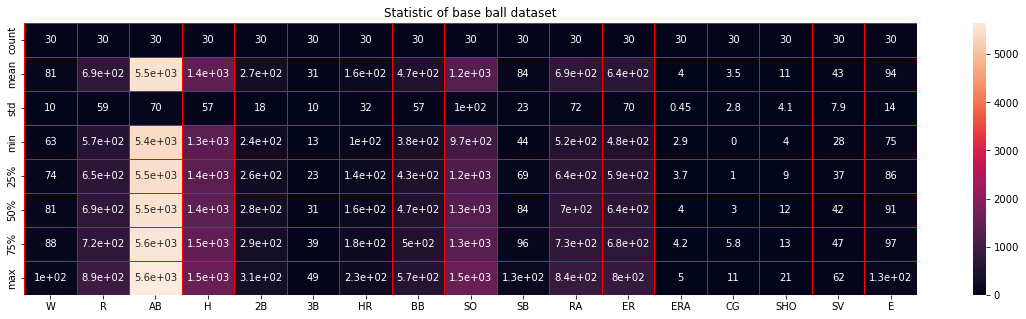

In [28]:
plt.figure(figsize=(20,5))
sns.heatmap(df.describe(),annot=True,linewidth=1,linecolor='r')
plt.savefig('Statistic of base ball daatset')
plt.title('Statistic of base ball dataset')
plt.show()

# Check outliers by plotting box plot 

In [29]:
ncol=9
nrow=3
col=df.columns

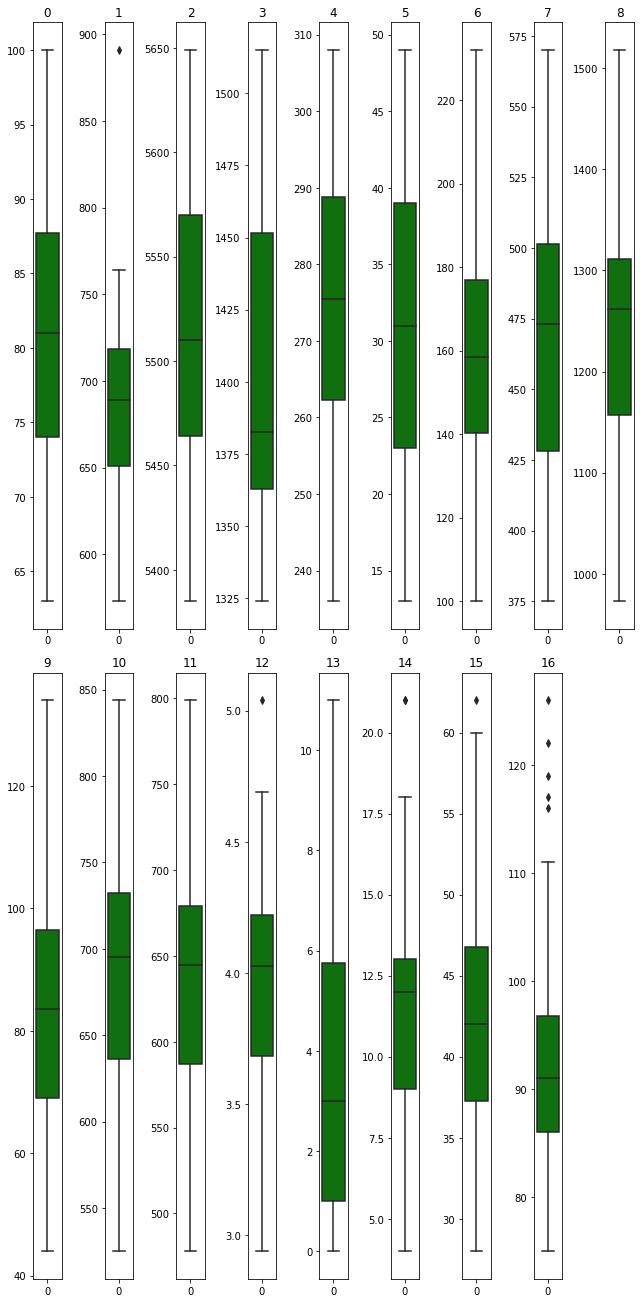

In [30]:
plt.figure(figsize=(ncol,3*ncol))
plt.title('Outliers of baseball dataset')
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='g',orient='v')
    plt.savefig('Outliers of baseball dataset')
    plt.tight_layout()

Outliers are present in Errors,save,shutout,earned run average,runs

# Check shkewness by plotting distplot

<AxesSubplot:xlabel='W', ylabel='Density'>

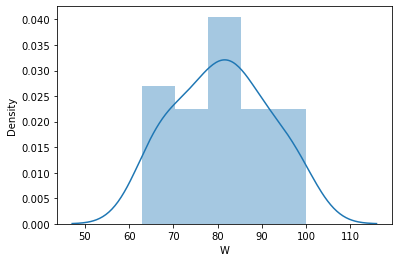

In [31]:
sns.distplot(df.W)

Wins columns look likes nearly noraml disrtibution curve.

<AxesSubplot:xlabel='R', ylabel='Density'>

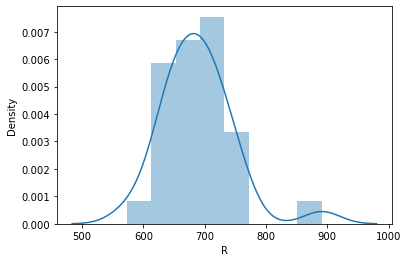

In [32]:
sns.distplot(df.R)

It ommit the normal distibution curve and skewness is present here

<AxesSubplot:xlabel='AB', ylabel='Density'>

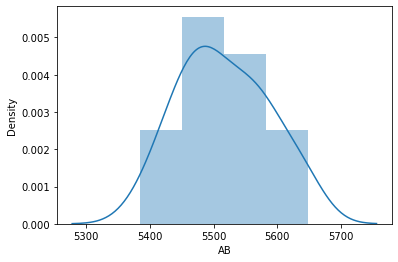

In [33]:
sns.distplot(df.AB)

it looks like noramal distribution curve but skewness present here

<AxesSubplot:xlabel='H', ylabel='Density'>

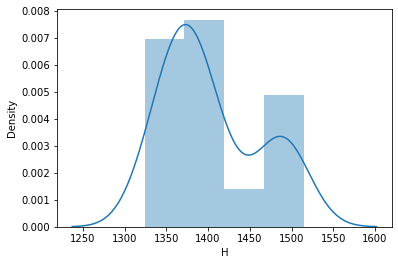

In [34]:
sns.distplot(df.H)

Here skewness present in hit variable

<AxesSubplot:xlabel='2B', ylabel='Density'>

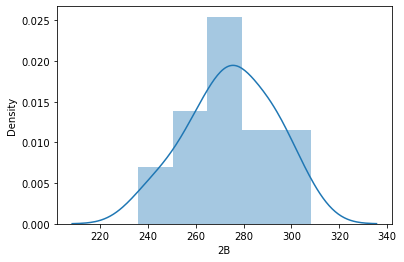

In [35]:
sns.distplot(df['2B'])

Here twise runs variable left skweness are present.

<AxesSubplot:xlabel='3B', ylabel='Density'>

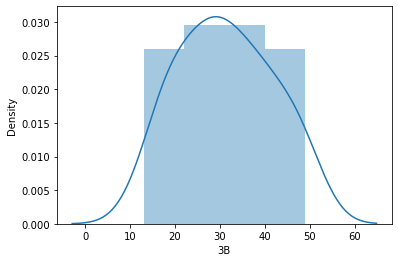

In [36]:
sns.distplot(df['3B'])

Nearly normal distribution curve but right side skewness is ppresent

<AxesSubplot:xlabel='HR', ylabel='Density'>

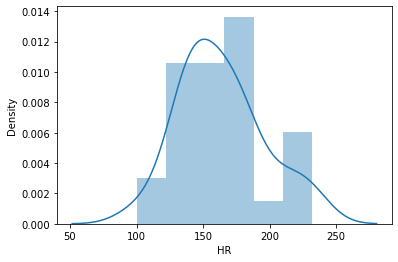

In [37]:
sns.distplot(df.HR)

Right side skewness is present in Homes run variable

<AxesSubplot:xlabel='BB', ylabel='Density'>

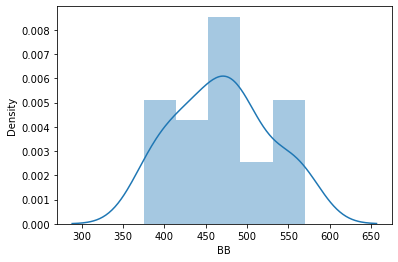

In [38]:
sns.distplot(df.BB)

left side skewness is present in Base on balls

<AxesSubplot:xlabel='SO', ylabel='Density'>

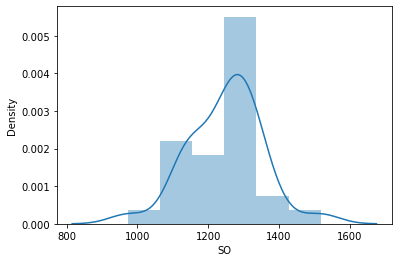

In [39]:
sns.distplot(df.SO)

left side skewness is present in Strike out variable

<AxesSubplot:xlabel='SB', ylabel='Density'>

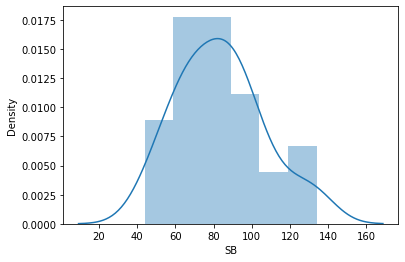

In [40]:
sns.distplot(df.SB)

Left side skewness is present in Stlone base variable

<AxesSubplot:xlabel='RA', ylabel='Density'>

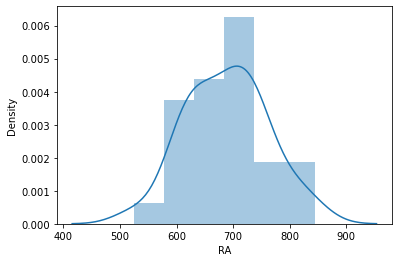

In [41]:
sns.distplot(df.RA)

Left side skewness is present in Run average

<AxesSubplot:xlabel='ER', ylabel='Density'>

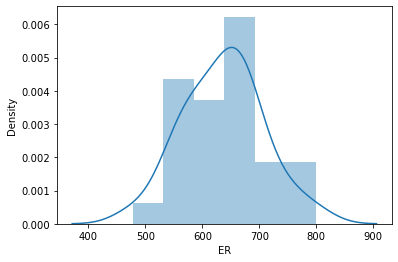

In [42]:
sns.distplot(df.ER)

left side skewness is preesnt in earned run variable

<AxesSubplot:xlabel='CG', ylabel='Density'>

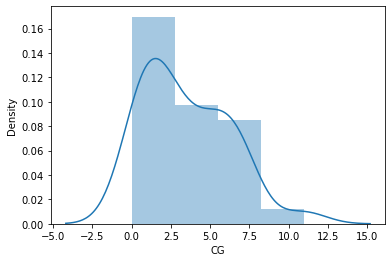

In [43]:
sns.distplot(df.CG)

Right side skewness is presentt in complete game

<AxesSubplot:xlabel='SHO', ylabel='Density'>

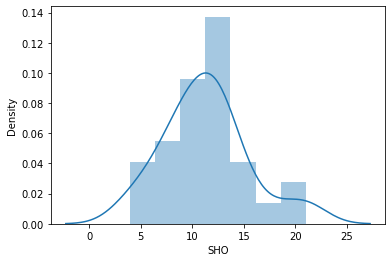

In [44]:
sns.distplot(df.SHO)

skewness is present in shutout

<AxesSubplot:xlabel='SV', ylabel='Density'>

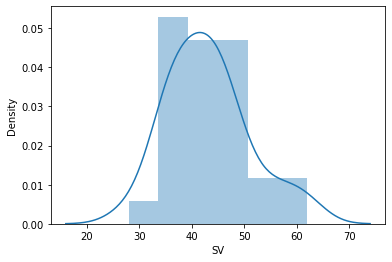

In [45]:
sns.distplot(df.SV)

skewness is present in Save variable 

<AxesSubplot:xlabel='E', ylabel='Density'>

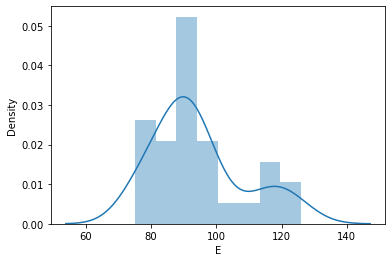

In [46]:
sns.distplot(df.E)

skewness is present in error variable

# Scatter plot-Bi varient Analaysis

<AxesSubplot:xlabel='R', ylabel='W'>

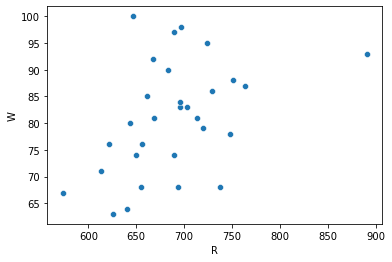

In [47]:
sns.scatterplot(x=df.R,y=df.W)

As runs scored is running continuous Win chances increases

<AxesSubplot:xlabel='AB', ylabel='W'>

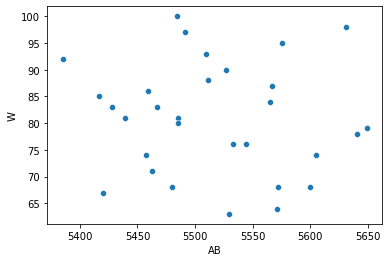

In [48]:
sns.scatterplot(x=df.AB,y=df.W)

As bat hit pitch not base ball  Win chances not say increases and decrease,it comes in scared form

<AxesSubplot:xlabel='H', ylabel='W'>

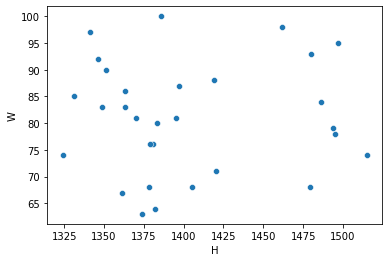

In [49]:
sns.scatterplot(x=df.H,y=df.W)

Hit balls increases chances of win tha game

<AxesSubplot:xlabel='2B', ylabel='W'>

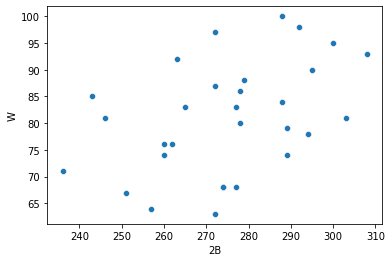

In [50]:
sns.scatterplot(x=df['2B'],y=df.W)

Double runs gives chances to win,so if double runs increase chances of wins

<AxesSubplot:xlabel='3B', ylabel='W'>

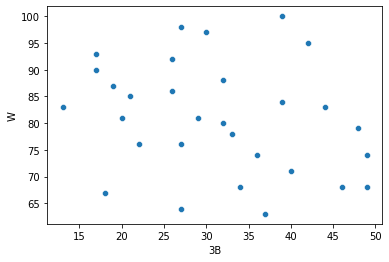

In [51]:
sns.scatterplot(x=df['3B'],y=df.W)

Triple runs gives chances to win,so if triple runs more then it  increases chances of wins

<AxesSubplot:xlabel='HR', ylabel='W'>

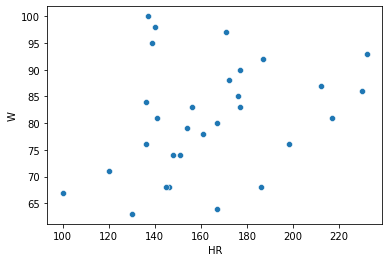

In [52]:
sns.scatterplot(x=df.HR,y=df.W)

Hit the balls and get perfect runs all four corner then it gives chances to win

<AxesSubplot:xlabel='BB', ylabel='W'>

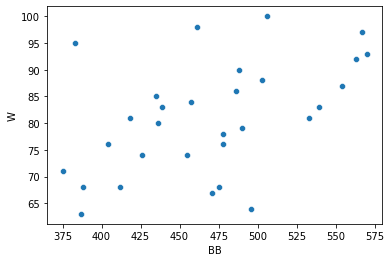

In [53]:
sns.scatterplot(x=df.BB,y=df.W)

Strike the ball then chances of wins is more

<AxesSubplot:xlabel='SO', ylabel='W'>

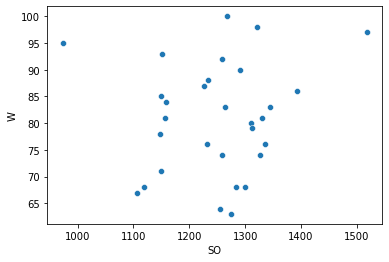

In [54]:
sns.scatterplot(x=df.SO,y=df.W)

Strike out increase then as well as chances of wins increase

<AxesSubplot:xlabel='SB', ylabel='W'>

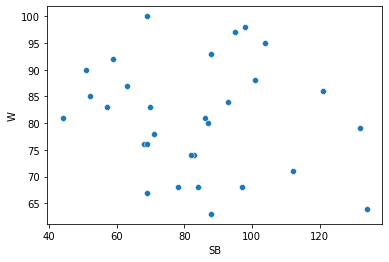

In [55]:
sns.scatterplot(x=df.SB,y=df.W)

<AxesSubplot:xlabel='RA', ylabel='W'>

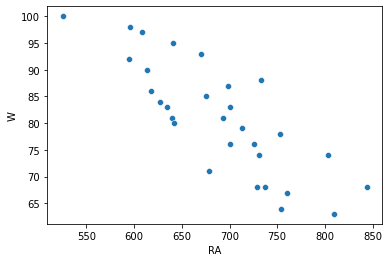

In [56]:
sns.scatterplot(x=df.RA,y=df.W)

if run average increase then we lost game mean chances of win the game is very low

<AxesSubplot:xlabel='ER', ylabel='W'>

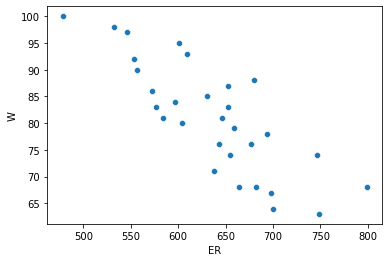

In [57]:
sns.scatterplot(x=df.ER,y=df.W)

if earned  run  increase then we lost game mean chances of win the game is very low

<AxesSubplot:xlabel='ERA', ylabel='W'>

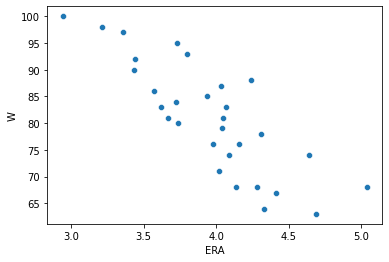

In [58]:
sns.scatterplot(x=df.ERA,y=df.W)

if earned run average  increase then we lost game mean chances of win the game is very low

<AxesSubplot:xlabel='CG', ylabel='W'>

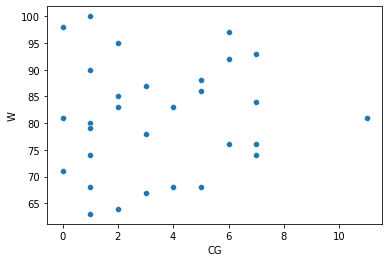

In [59]:
sns.scatterplot(x=df.CG,y=df.W)

complete game variable scatter more so we can't say that

<AxesSubplot:xlabel='SHO', ylabel='W'>

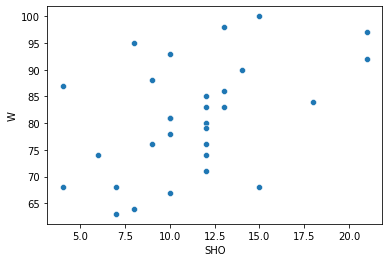

In [60]:
sns.scatterplot(x=df.SHO,y=df.W)

<AxesSubplot:xlabel='SV', ylabel='W'>

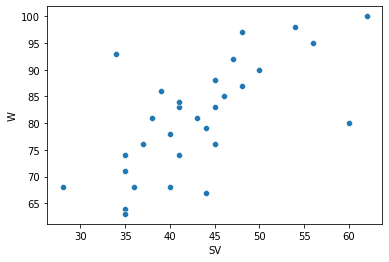

In [61]:
sns.scatterplot(x=df.SV,y=df.W)

If team led by oppoiste team then it increase the win chances

<AxesSubplot:xlabel='E', ylabel='W'>

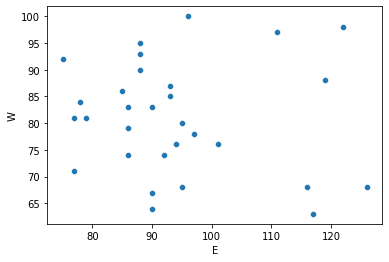

In [62]:
sns.scatterplot(x=df.E,y=df.W)

If team make more errors then it incrase chances of lost the game

# Multi varient-Joint plot Analysis

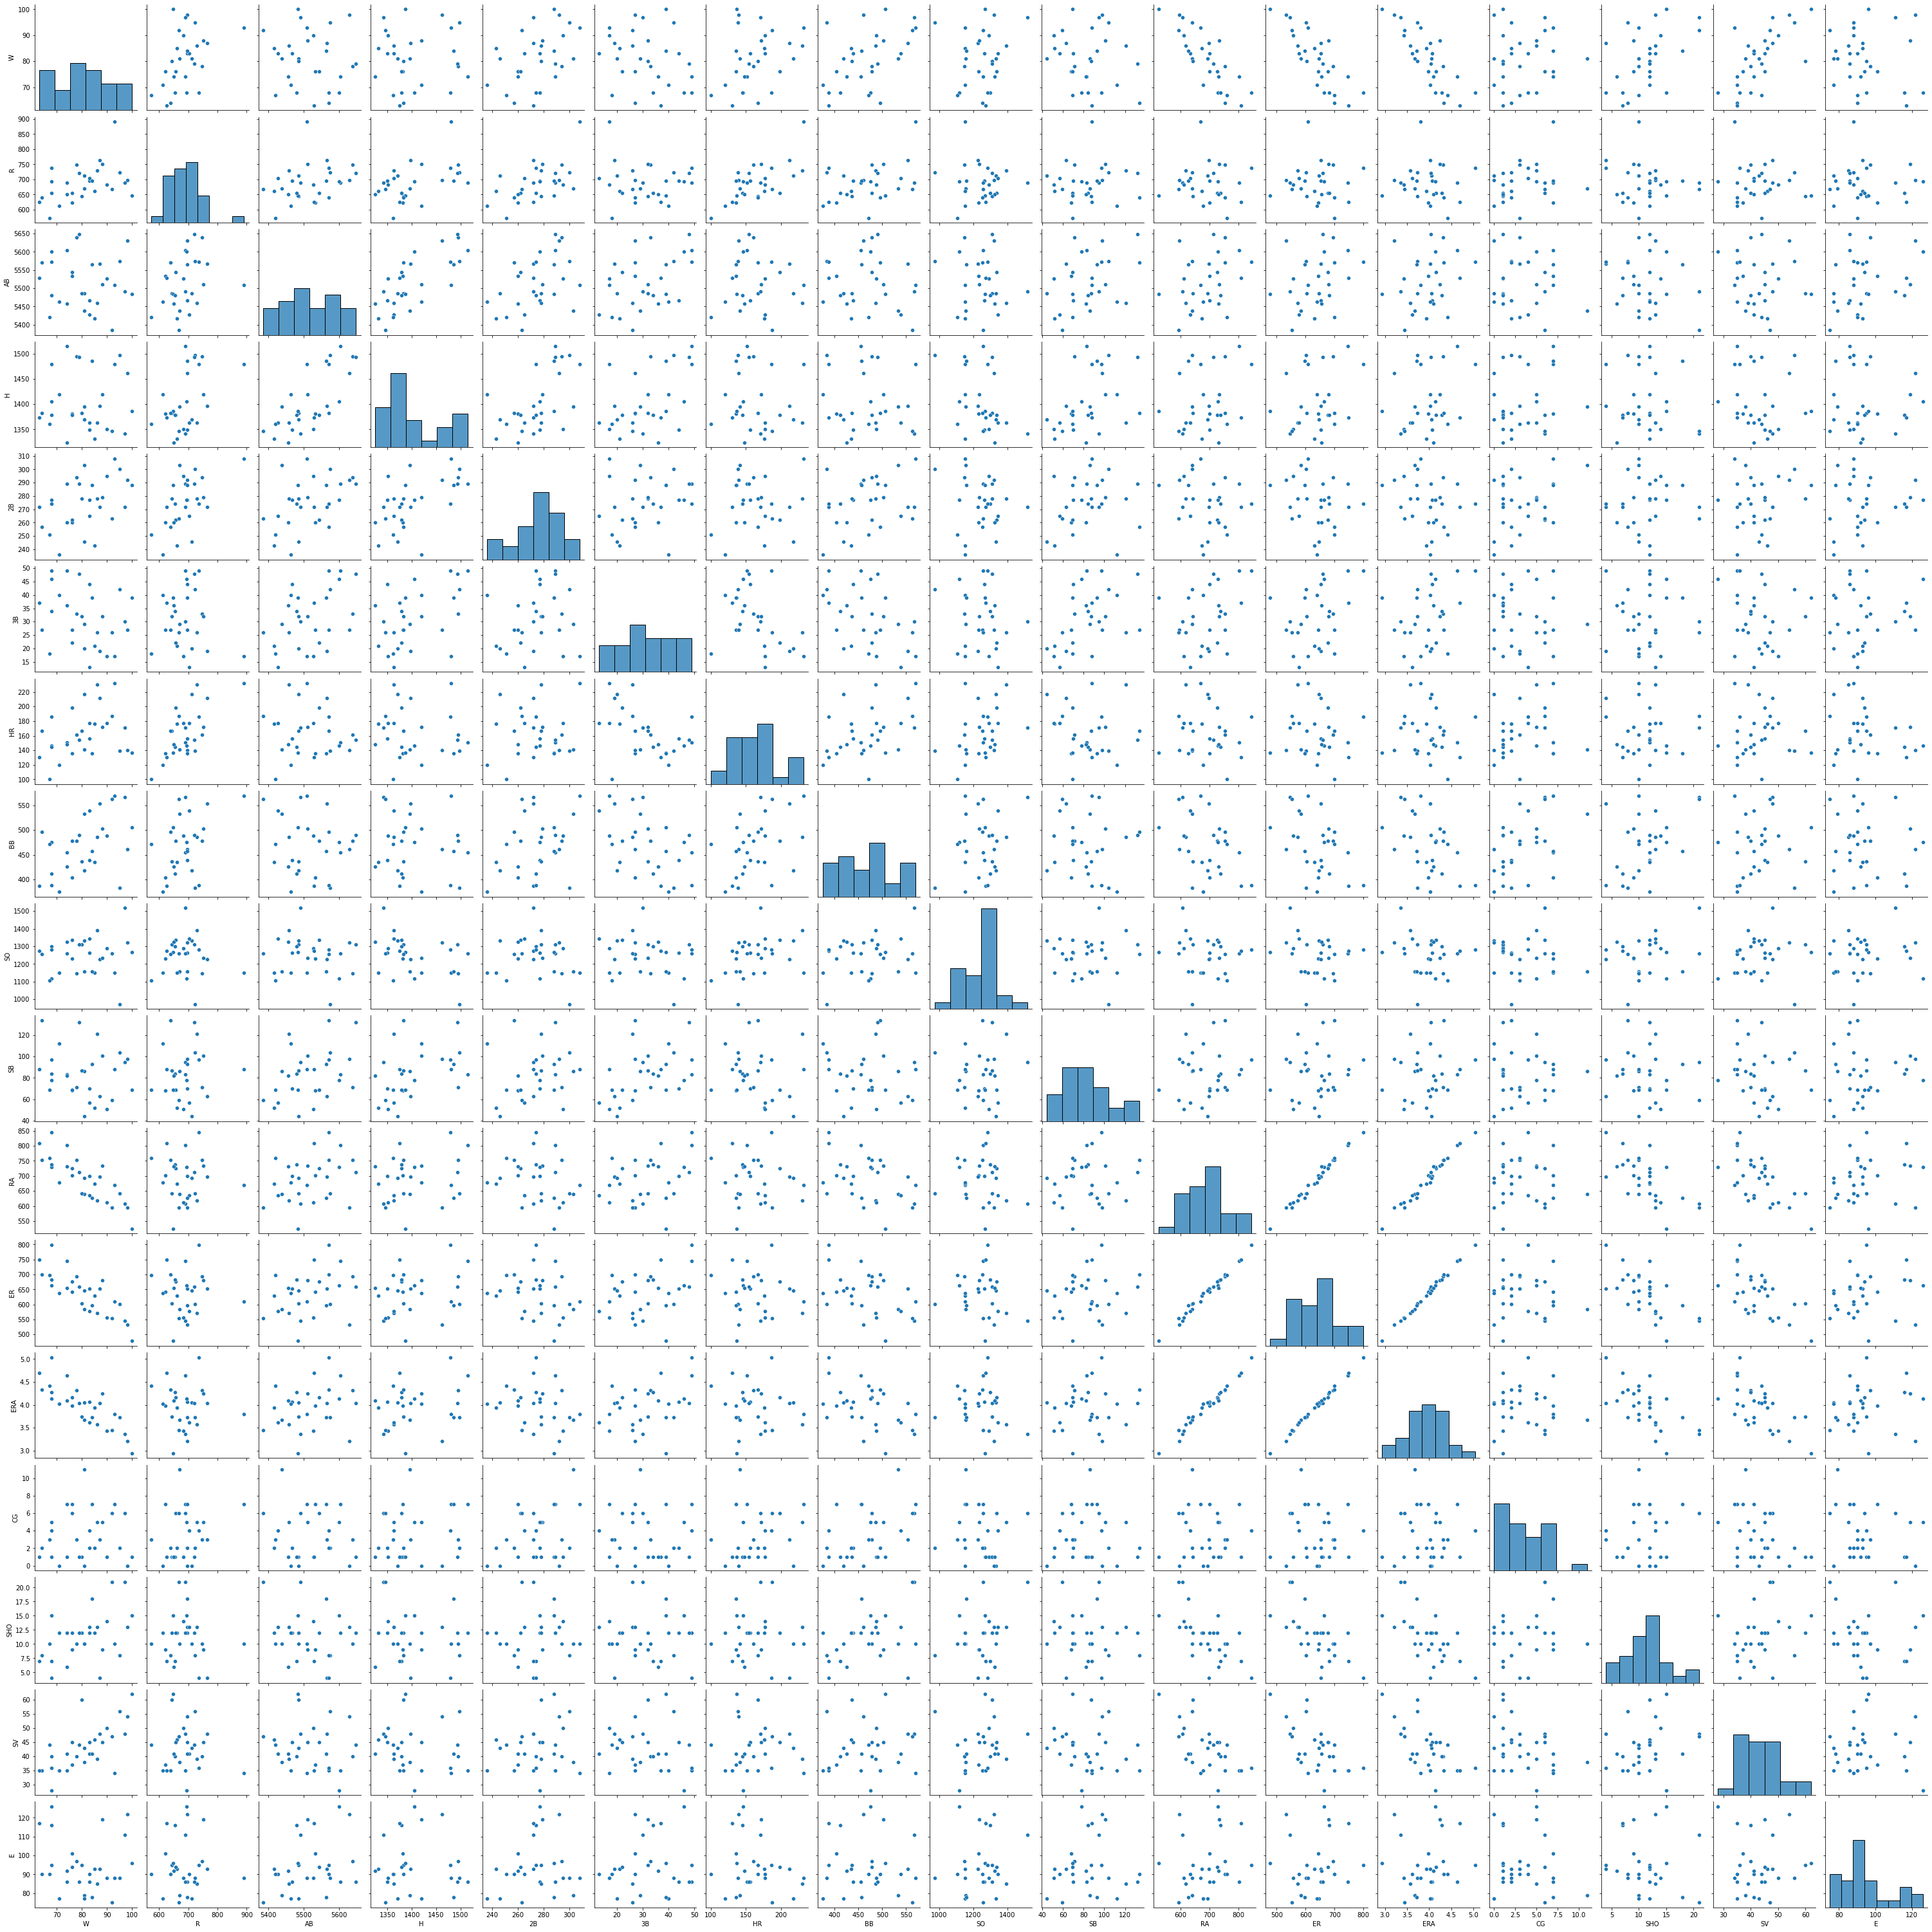

In [63]:
sns.pairplot(df)

# Check Correlation between variable

In [64]:
df.corr()   #check corelation between variable,how they works each other

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


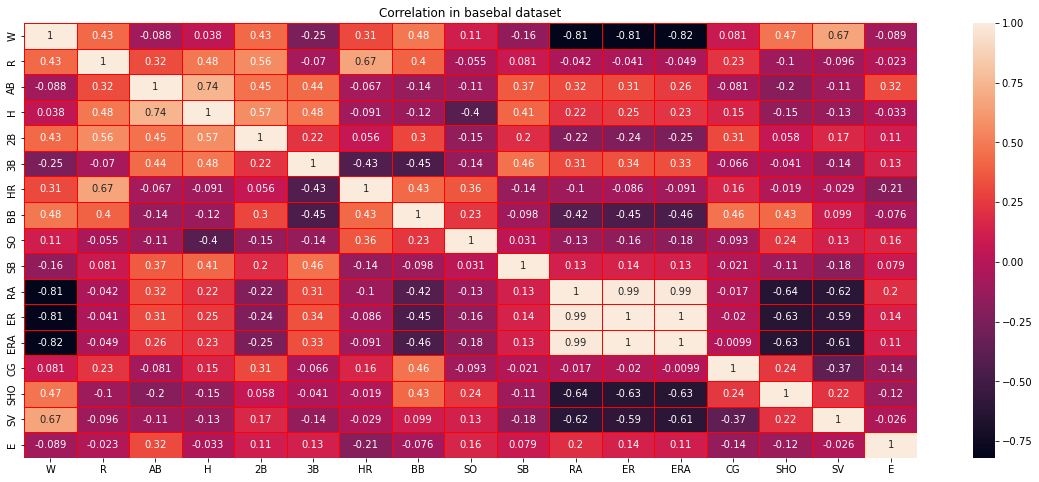

In [65]:
plt.figure(figsize=(20,8))   #beter understand correlation by visulaization
sns.heatmap(df.corr(),linewidth=1,linecolor='r',annot=True)
plt.title('Correlation in basebal dataset')
plt.savefig('Correlation in basebal dataset')
plt.show()

In [66]:
a=df.corr()

In [67]:
a['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [68]:
df=df.drop(['CG','H','AB','E'],axis=1)

# Check Outliers

In [69]:
from scipy.stats import zscore   #import zscore libaries for removing outliers

In dataset outliers are present

In [70]:
(np.abs(zscore(df))<3).all()

W       True
R      False
2B      True
3B      True
HR      True
BB      True
SO      True
SB      True
RA      True
ER      True
ERA     True
SHO     True
SV      True
dtype: bool

Outliers are present in Runs variable,remove by using IQR method

# IQR METHOD

In [71]:
type(df)

pandas.core.frame.DataFrame

In [72]:
q1=df['R'].quantile(0.25)   #check for 25% data of runs variable
q1

651.25

In [73]:
q2=df['R'].quantile(0.75)   #check for 75 data of runs variable
q2

718.25

In [74]:
IQR=q2-q1   #get 50%(median value) data of runs variable
IQR

67.0

In [75]:
upper=q2+(1.5*IQR)
lower=q1-(1.5*IQR)

In [76]:
df1=df[(df['R']>lower) & (df['R']<upper)]
df1

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,289,49,151,455,1259,83,803,746,4.64,12,35
6,87,764,272,19,212,554,1227,63,698,652,4.03,4,48
7,81,713,246,20,217,418,1331,44,693,646,4.05,10,43
8,80,644,278,32,167,436,1310,87,642,604,3.74,12,60
9,78,748,294,33,161,478,1148,71,753,694,4.31,10,40
10,88,751,279,32,172,503,1233,101,733,680,4.24,9,45


In [77]:
df1.isnull().sum().sum()

0

NO null value after removing outliers by IQR method

In [78]:
df.shape

(30, 13)

shape before removig outliers

In [79]:
df1.shape

(29, 13)

Shape after removing outliers 29 rows and 17 columns

In [80]:
data_loss_iqr=((30-29)/29)*100
print(f"Data_loss_IQR:{data_loss_iqr}")

Data_loss_IQR:3.4482758620689653


# Try 2nd method-ZSCORE

In [81]:
from scipy.stats import zscore

In [82]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [83]:
df2=df[(z<3).all(axis=1)]
df2

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,289,49,151,455,1259,83,803,746,4.64,12,35
6,87,764,272,19,212,554,1227,63,698,652,4.03,4,48
7,81,713,246,20,217,418,1331,44,693,646,4.05,10,43
8,80,644,278,32,167,436,1310,87,642,604,3.74,12,60
9,78,748,294,33,161,478,1148,71,753,694,4.31,10,40
10,88,751,279,32,172,503,1233,101,733,680,4.24,9,45


In [84]:
df.shape   # shape before removing outliers

(30, 13)

In [85]:
df2.shape  #shape after removing ouliers by zscore method

(29, 13)

In [86]:
data_loss_zscore=((30-29)/29)*100
print(f"Data_loss_zscore:{data_loss_zscore}")

Data_loss_zscore:3.4482758620689653


By IQR and ZSCORE method loss are equal by both method

# Check Skewness

In [87]:
df1.skew().sort_values(ascending=False)   #check skewness in dataset

SV     0.627480
SHO    0.526943
SB     0.494966
HR     0.450862
BB     0.151193
W      0.119013
3B     0.090124
ER     0.018461
RA     0.018155
ERA    0.016693
R     -0.215364
SO    -0.233815
2B    -0.335304
dtype: float64

The safe theshold value is taken +/-0.50 for skewness value 

Skewness is present-->CG,E,H,SV,SHO

In [88]:
type(df1)

pandas.core.frame.DataFrame

# Check multi colonility

In [89]:
# import multicolonilty libariey
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [90]:
a=df1.drop('W',axis=1)

In [91]:
def calc_vif():    #check multicolonility
    vif=pd.DataFrame()
    vif['variables']=a.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
    return(vif)

In [92]:
calc_vif()   #check multicolonility

,variables,VIF_FACTOR
0,R,819.178784
1,2B,569.500326
2,3B,30.385316
3,HR,177.034315
4,BB,186.881327
5,SO,374.951549
6,SB,24.476939
7,RA,13581.652934
8,ER,42097.380116
9,ERA,19561.689478


In [93]:
a=a.drop(['ER'],axis=1)   #found multicolonility between er and era,we drop er becoz it less correlated with target variable

In [94]:
calc_vif()

,variables,VIF_FACTOR
0,R,792.694198
1,2B,569.494814
2,3B,29.350261
3,HR,136.852944
4,BB,180.892055
5,SO,305.783984
6,SB,21.100629
7,RA,6175.770802
8,ERA,4896.337287
9,SHO,20.408370


# Remove skewness by power method

In [96]:
x=a.drop('ERA',axis=1)

First of all change scaler of x before apply power method

In [97]:
type(x)

pandas.core.frame.DataFrame

Apply powwer tranform method

In [98]:
from sklearn.preprocessing import power_transform   #import removing skewness laibaries

In [99]:
x=power_transform(x)

In [100]:
type(x)  #type chage frame to array

numpy.ndarray

In [101]:
 x=pd.DataFrame(x)  #change type from array to frame

In [102]:
x.skew()  #removing skewess after check skewness

0   -0.024842
1   -0.052793
2   -0.075139
3    0.000448
4   -0.008572
5    0.051530
6   -0.009570
7   -0.011974
8    0.000529
9   -0.000925
dtype: float64

all range in comes in+/-0.5 value ,so skewness is removed but not complete remove

# Concert scaler

In [103]:
from sklearn.preprocessing import StandardScaler #before removing skewness convert into scaler form

In [104]:
st=StandardScaler()

In [105]:
x=st.fit_transform(x)

In [106]:
x.shape

(29, 10)

In [107]:
y=df1.W

In [108]:
y=pd.DataFrame(y)

In [109]:
y.shape

(29, 1)

# Apply diffrent model for prediction

In [110]:
li=LinearRegression()
dtc=DecisionTreeRegressor()
sv=SVR()
kn=KNeighborsRegressor()
ad=AdaBoostRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

# MODEL-LINEAR REGRESSION

In [111]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    li.fit(x_train,y_train)
    test_pred=li.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.564715093252681 Random_state at 0
Max accuracy 0.564715093252681 Max_Random_state 0


Accuracy 0.9012453976119246 Random_state at 1
Max accuracy 0.9012453976119246 Max_Random_state 1


Accuracy -0.09834447940704649 Random_state at 2
Accuracy 0.8401555198019035 Random_state at 3
Accuracy 0.8309623177331443 Random_state at 4
Accuracy 0.6317008289481687 Random_state at 5
Accuracy 0.9076641819485354 Random_state at 6
Max accuracy 0.9076641819485354 Max_Random_state 6


Accuracy 0.5564260354730177 Random_state at 7
Accuracy 0.8112911279879951 Random_state at 8
Accuracy 0.4336070403583835 Random_state at 9


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=6)
li.fit(x_train,y_train)
pred_li=li.predict(x_test)
pred_train=li.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_li)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_li)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_li))}")
print(f"Accuracy_Score of test: {r2_score(y_test,pred_li)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train)*100}")
print(f"Dataset_Score_With_Model:{li.score(x_train,y_train)*100}")

Mean_Absolute_Error: 2.937726925438208
Mean_Squared_Error: 13.709304096807726
Root_Mean_Absolute_Error: 3.7026077427682944
Accuracy_Score of test: 90.76641819485354
Accuracy_Score of train: 90.26675703644649
Dataset_Score_With_Model:90.26675703644649


# MODEL-DECISION TREE REGRESSOR

In [113]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    dtc.fit(x_train,y_train)
    test_pred=dtc.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy -0.452416918429003 Random_state at 0
Accuracy 0.31861575178997614 Random_state at 1
Max accuracy 0.31861575178997614 Max_Random_state 1


Accuracy -3.2888086642599283 Random_state at 2
Accuracy 0.5511658031088082 Random_state at 3
Max accuracy 0.5511658031088082 Max_Random_state 3


Accuracy -0.3243328100470957 Random_state at 4
Accuracy -1.7690522243713729 Random_state at 5
Accuracy -0.07539756782039286 Random_state at 6
Accuracy 0.11194029850746268 Random_state at 7
Accuracy 0.5829994774429542 Random_state at 8
Max accuracy 0.5829994774429542 Max_Random_state 8


Accuracy -0.2873180873180874 Random_state at 9


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=8)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train_dtc=dtc.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_dtc)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_dtc)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_dtc))}")
print(f"Accuracy_Score of test: {r2_score(y_test,pred_dtc)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_dtc)*100}")
print(f"Dataset_Score_With_Model:{dtc.score(x_train,y_train)*100}")

Mean_Absolute_Error: 7.0
Mean_Squared_Error: 83.66666666666667
Root_Mean_Absolute_Error: 9.146948489341495
Accuracy_Score of test: 47.535272600592236
Accuracy_Score of train: 100.0
Dataset_Score_With_Model:100.0


# MODEL-SUPPORT VECTOR REGRESSOR

In [115]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    sv.fit(x_train,y_train)
    test_pred=sv.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.2303382325325577 Random_state at 0
Max accuracy 0.2303382325325577 Max_Random_state 0


Accuracy 0.12208698089745651 Random_state at 1
Accuracy -3.037286538042655 Random_state at 2
Accuracy 0.15853139171965258 Random_state at 3
Accuracy 0.027815939757992014 Random_state at 4
Accuracy 0.18108712551349992 Random_state at 5
Accuracy 0.09888190223946947 Random_state at 6
Accuracy -0.013702172255585898 Random_state at 7
Accuracy 0.046032847599487114 Random_state at 8
Accuracy -0.0014694153003453891 Random_state at 9


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_sv)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_sv)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_sv))}")
print(f"Accuracy_Score_of_test: {r2_score(y_test,pred_sv)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_sv)*100}")
print(f"Dataset_Score_With_Model:{sv.score(x_train,y_train)*100}")

Mean_Absolute_Error: 6.164112542972991
Mean_Squared_Error: 56.612898895938535
Root_Mean_Absolute_Error: 7.524154364175321
Accuracy_Score_of_test: 23.03382325325577
Accuracy_Score of train: 22.900718104295358
Dataset_Score_With_Model:22.900718104295358


# MODEL-KNEIGHBORS REGRESSOR

In [117]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    kn.fit(x_train,y_train)
    test_pred=kn.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.5175528700906346 Random_state at 0
Max accuracy 0.5175528700906346 Max_Random_state 0


Accuracy 0.6916467780429594 Random_state at 1
Max accuracy 0.6916467780429594 Max_Random_state 1


Accuracy -1.1809675090252711 Random_state at 2
Accuracy 0.6369300518134717 Random_state at 3
Accuracy 0.6602323390894821 Random_state at 4
Accuracy 0.7336324951644096 Random_state at 5
Max accuracy 0.7336324951644096 Max_Random_state 5


Accuracy 0.6023049579045835 Random_state at 6
Accuracy 0.5895522388059699 Random_state at 7
Accuracy 0.6539000174185683 Random_state at 8
Accuracy 0.38538045738045734 Random_state at 9


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
pred_train_kn=kn.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_kn)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_kn)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_kn))}")
print(f"Accuracy_Score_of_test: {r2_score(y_test,pred_kn)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_kn)*100}")
print(f"Dataset_Score_With_Model:{kn.score(x_train,y_train)*100}")

Mean_Absolute_Error: 4.033333333333336
Mean_Squared_Error: 19.126666666666697
Root_Mean_Absolute_Error: 4.373404470966149
Accuracy_Score_of_test: 73.36324951644096
Accuracy_Score of train: 71.22313716263906
Dataset_Score_With_Model:71.22313716263906


# MODEL-ADA BOOST REGRESSOR

In [119]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    ad.fit(x_train,y_train)
    test_pred=ad.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.6225217145015105 Random_state at 0
Max accuracy 0.6225217145015105 Max_Random_state 0


Accuracy 0.8591139618138425 Random_state at 1
Max accuracy 0.8591139618138425 Max_Random_state 1


Accuracy -0.6972322503008428 Random_state at 2
Accuracy 0.7948737198085193 Random_state at 3
Accuracy 0.7051388844391758 Random_state at 4
Accuracy 0.7612125291122253 Random_state at 5
Accuracy 0.6291973552751313 Random_state at 6
Accuracy -0.07077918231969438 Random_state at 7
Accuracy 0.7480972643368444 Random_state at 8
Accuracy -0.17458419958419968 Random_state at 9


In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
pred_train_ad=ad.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_ad)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_ad)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_ad))}")
print(f"Accuracy_Score_of_test: {r2_score(y_test,pred_ad)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_ad)*100}")
print(f"Dataset_Score_With_Model:{ad.score(x_train,y_train)*100}")

Mean_Absolute_Error: 4.544444444444442
Mean_Squared_Error: 29.96370370370369
Root_Mean_Absolute_Error: 5.4739111888761665
Accuracy_Score_of_test: 78.54627419782551
Accuracy_Score of train: 98.50991089311883
Dataset_Score_With_Model:98.50991089311883


# MODEL-GRADIENT BOOSTING REGRESSOR

In [121]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    gb.fit(x_train,y_train)
    test_pred=gb.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.29664633275682084 Random_state at 0
Max accuracy 0.29664633275682084 Max_Random_state 0


Accuracy 0.28288684796753216 Random_state at 1
Accuracy -0.7238727066402562 Random_state at 2
Accuracy 0.8086885528044091 Random_state at 3
Max accuracy 0.8086885528044091 Max_Random_state 3


Accuracy 0.680990229874226 Random_state at 4
Accuracy 0.4917573353376422 Random_state at 5
Accuracy 0.669286275779363 Random_state at 6
Accuracy -0.16388855216997622 Random_state at 7
Accuracy 0.7727285013054632 Random_state at 8
Accuracy -0.062167814291734125 Random_state at 9


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train_gb=gb.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_gb)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_gb)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_gb))}")
print(f"Accuracy_Score_of_test: {r2_score(y_test,pred_gb)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_gb)*100}")
print(f"Dataset_Score_With_Model:{gb.score(x_train,y_train)*100}")

Mean_Absolute_Error: 5.0060465131438034
Mean_Squared_Error: 30.099435522182606
Root_Mean_Absolute_Error: 5.486295245626379
Accuracy_Score_of_test: 82.45499224743241
Accuracy_Score of train: 99.99993151110176
Dataset_Score_With_Model:99.99993151110176


# MODEL-RANDOM FOREST REGRESSOR

In [123]:
maxacc=0
maxrand=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    rf.fit(x_train,y_train)
    test_pred=rf.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.6065987160120846 Random_state at 0
Max accuracy 0.6065987160120846 Max_Random_state 0


Accuracy 0.7553687350835323 Random_state at 1
Max accuracy 0.7553687350835323 Max_Random_state 1


Accuracy -0.6431643321299632 Random_state at 2
Accuracy 0.6939510362694301 Random_state at 3
Accuracy 0.8266857142857142 Random_state at 4
Max accuracy 0.8266857142857142 Max_Random_state 4


Accuracy 0.8008167117988394 Random_state at 5
Accuracy 0.6011662488306827 Random_state at 6
Accuracy -0.35107388059701505 Random_state at 7
Accuracy 0.643909249259711 Random_state at 8
Accuracy 0.08601463617463578 Random_state at 9


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
print(f"Mean_Absolute_Error: {mean_absolute_error(y_test,pred_rf)}")
print(f"Mean_Squared_Error: {mean_squared_error(y_test,pred_rf)}")
print(f"Root_Mean_Absolute_Error: {np.sqrt(mean_squared_error(y_test,pred_rf))}")
print(f"Accuracy_Score_of_train: {r2_score(y_test,pred_rf)*100}")
print(f"Accuracy_Score of train: {r2_score(y_train,pred_train_rf)*100}")
print(f"Dataset_Score_With_Model:{rf.score(x_train,y_train)*100}")

Mean_Absolute_Error: 3.50666666666667
Mean_Squared_Error: 17.418033333333362
Root_Mean_Absolute_Error: 4.17349174353243
Accuracy_Score_of_train: 80.31242700156983
Accuracy_Score of train: 92.76649210592868
Dataset_Score_With_Model:92.76649210592868


# Conclusion of using train test split method 

### TRAIN_TEST_SPLIT_METHOD-BEST_MODEL-->SVR(LINEAR)

# USE CROSS VAL SCORE METHOD FOR FIND BEST MODEL IN THIS METHOD

# CV_SCORE-->LINEAR REGRESSION

In [125]:
li.fit(x_train,y_train)
test_li=li.predict(x_test)
train_li=li.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score_li=cross_val_score(li,x,y,cv=cv1)
    mean_score_li=cv_score_li.mean()
    print(f"At cv={i},mean_score is {mean_score_li}.The test accuracy_score is {r2_score(y_test,test_li)} and train accuracy is {r2_score(y_train,train_li)}.")
    print('\n')      

At cv=2,mean_score is 0.25637294445511283.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=3,mean_score is 0.577454275569632.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=4,mean_score is -0.16647495104240265.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=5,mean_score is 0.2646975860205487.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=6,mean_score is 0.6324943441544645.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=7,mean_score is 0.6518775883965136.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=8,mean_score is 0.27163218361254815.The test accuracy_score is 0.8309623177331443 and train accuracy is 0.9191186986335104.


At cv=9,mean_score is -1.9656645627717642.The test accuracy_score is 0.830962317

# CV_SCORE-->DECISION TREE REGRESSOR

In [126]:
dtc.fit(x_train,y_train)
test_dtc=dtc.predict(x_test)
train_dtc=dtc.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score_dtc=cross_val_score(dtc,x,y,cv=cv1)
    mean_score_dtc=cv_score_dtc.mean()
    print(f"At cv={i},mean_score is {mean_score_dtc}.The test accuracy_score is {r2_score(y_test,test_dtc)} and train accuracy is {r2_score(y_train,train_dtc)}.")
    print('\n')      

At cv=2,mean_score is -0.07924327871268633.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=3,mean_score is 0.32222863128999285.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=4,mean_score is -0.2930607990489048.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=5,mean_score is -0.6501413183047797.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=6,mean_score is -0.08536403925276252.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=7,mean_score is -0.35388205118155774.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=8,mean_score is -1.5623661614706679.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.


At cv=9,mean_score is -0.48847966750175037.The test accuracy_score is 0.6025117739403454 and train accuracy is 1.0.




# CV_SCORE-->SVR(RBF)

In [127]:
test=sv.predict(x_test)
train=sv.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(sv,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f"At cv={i},mean_score is {mean_score}.The test accuracy_score is {r2_score(y_test,test)} and train accuracy is {r2_score(y_train,train)}.")
    print('\n')      

At cv=2,mean_score is 0.11288587447591975.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=3,mean_score is -0.043472623676543476.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=4,mean_score is -0.10030702034560429.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=5,mean_score is -0.3758927673645076.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=6,mean_score is 0.015003391426244924.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=7,mean_score is 0.005359547826514583.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=8,mean_score is -0.9158452085944009.The test accuracy_score is 0.11082446594989082 and train accuracy is 0.25432055109104235.


At cv=9,mean_score is -0.33073856694844217.The test accur

At random state 4 mean score is -7.64%.At this stage test accuracy is -4.6% and train accuracy score is 21.64%.

# CV_SCORE-->KNEIGHBORS REGRESSOR

In [128]:
test=kn.predict(x_test)
train=kn.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)  
    cv_score=cross_val_score(kn,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f"At cv={i},mean_score is {mean_score}.The test accuracy_score is {r2_score(y_test,test)} and train accuracy is {r2_score(y_train,train)}.")
    print('\n')      

At cv=2,mean_score is 0.3144592997921902.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=3,mean_score is 0.5779340975958632.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=4,mean_score is 0.46666004937805144.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=5,mean_score is 0.4971370728343584.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=6,mean_score is 0.5491074869861688.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=7,mean_score is 0.4313302480384044.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=8,mean_score is -0.19484753211720154.The test accuracy_score is 0.5209042386185245 and train accuracy is 0.7001914809061021.


At cv=9,mean_score is 0.3530882954483766.The test accuracy_score is 0.5209042386

# CV_SCORE-->ADA BOOST REGRESSOR

In [129]:
test=ad.predict(x_test)
train=ad.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(ad,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f"At cv={i},mean_score is {mean_score}.The test accuracy_score is {r2_score(y_test,test)} and train accuracy is {r2_score(y_train,train)}.")
    print('\n')      

At cv=2,mean_score is 0.36252692755930754.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=3,mean_score is 0.4490975867131299.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=4,mean_score is 0.22964773944708872.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=5,mean_score is 0.642630183648849.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=6,mean_score is 0.3737518569487372.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=7,mean_score is 0.40548897818736124.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=8,mean_score is 0.48510101641340747.The test accuracy_score is 0.9129839062783669 and train accuracy is 0.8815983106021384.


At cv=9,mean_score is -4.183454406764673.The test accuracy_score is 0.9129839062

# CV_SCORE-->GRADIENT BOOSTING REGRESSOR 

In [130]:
test=gb.predict(x_test)
train=gb.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(gb,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f"At cv={i},mean_score is {mean_score}.The test accuracy_score is {r2_score(y_test,test)} and train accuracy is {r2_score(y_train,train)}.")
    print('\n')      

At cv=2,mean_score is 0.36793149230156447.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=3,mean_score is -0.014523218014386904.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=4,mean_score is 0.3729608853874904.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=5,mean_score is 0.3247469840430293.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=6,mean_score is -0.022757415761812155.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=7,mean_score is -0.5261796018999065.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=8,mean_score is 0.22134025687899195.The test accuracy_score is 0.9934290585629482 and train accuracy is 0.9264148321462231.


At cv=9,mean_score is -0.0679611984467753.The test accuracy_score is 0.993

# CV_SCORE-->RANDOM FOREST REGRESSOR

In [131]:
test=rf.predict(x_test)
train=rf.predict(x_train)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(rf,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f"At cv={i},mean_score is {mean_score}.The test accuracy_score is {r2_score(y_test,test)} and train accuracy is {r2_score(y_train,train)}.")
    print('\n')      

At cv=2,mean_score is 0.4172327221931939.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=3,mean_score is 0.15355062207743597.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=4,mean_score is 0.5878816819283359.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=5,mean_score is 0.40005963142234185.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=6,mean_score is 0.4727359263082167.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=7,mean_score is 0.032013380197797585.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=8,mean_score is -2.137968445221042.The test accuracy_score is 0.8031242700156983 and train accuracy is 0.9276649210592868.


At cv=9,mean_score is -0.3087204227269769.The test accuracy_score is 0.80312427

# Conclusion of CROSS VAL SCORE METHOD

The best model find by model_section use CROSS_VAL_SCORE method is Linear regression.
It has low diffrence between in  test value and train value is only ,it is best value in all models.
It give best mean_score or test accuracy near 96.43% and train accuracy is near 84.40%.
There are many models whoes take diffrent best category models like highest score is 96.43 give by linear regresssion and 
train accuracy give 100% given by gradient_boosting .But Linear Regression take all part in best so we select this models.

### CROSS_VAAL_SCORE_METHOD-BEST_MODEL-->LINEAR_REGRESSION

# Hyperparameter tuning by GridsearchCV for Linear Regression

In [136]:
Gs=GridSearchCV(li,dict1,cv=7)
Gs

GridSearchCV(cv=7, estimator=LinearRegression(), param_grid={})

In [137]:
Gs.fit(x,y)

GridSearchCV(cv=7, estimator=LinearRegression(), param_grid={})

In [139]:
Gs.best_score_

0.213470553036069

In [142]:
Gs.best_estimator_

LinearRegression()

# Save model

In [140]:
import joblib

In [143]:
joblib.dump(Gs.best_estimator_,'base.pkl')

['base.pkl']